<a href="https://colab.research.google.com/github/Houzelstein/Projet-French-Industry/blob/main/final_french_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
!pip install geopandas
import geopandas as gpd
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_theme()

from math import radians, cos, sin, asin, sqrt

!pip install basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 78.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 90.4 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


IMPORTATION ET PREMIERE VISUALISATION DE NOS JEUX DE DEONNEES

In [ ]:
# Importation des jeux de données :
salaire = pd.read_csv('/content/drive/MyDrive/French Industry/net_salary_per_town_categories.csv', sep = ',')
entreprise = pd.read_csv('/content/drive/MyDrive/French Industry/base_etablissement_par_tranche_effectif.csv', sep = ',')
geo= pd.read_csv('/content/drive/MyDrive/French Industry/name_geographic_information.csv', sep = ',')
population = pd.read_csv('/content/drive/MyDrive/French Industry/population.csv', sep = ',')
departements = gpd.read_file('/content/drive/MyDrive/French Industry/departements.geojson')

<ipython-input-3-431229745a0d>:5: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
salaire.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


In [ ]:
salaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODGEO     5136 non-null   object 
 1   LIBGEO     5136 non-null   object 
 2   SNHM14     5136 non-null   float64
 3   SNHMC14    5136 non-null   float64
 4   SNHMP14    5136 non-null   float64
 5   SNHME14    5136 non-null   float64
 6   SNHMO14    5136 non-null   float64
 7   SNHMF14    5136 non-null   float64
 8   SNHMFC14   5136 non-null   float64
 9   SNHMFP14   5136 non-null   float64
 10  SNHMFE14   5136 non-null   float64
 11  SNHMFO14   5136 non-null   float64
 12  SNHMH14    5136 non-null   float64
 13  SNHMHC14   5136 non-null   float64
 14  SNHMHP14   5136 non-null   float64
 15  SNHMHE14   5136 non-null   float64
 16  SNHMHO14   5136 non-null   float64
 17  SNHM1814   5136 non-null   float64
 18  SNHM2614   5136 non-null   float64
 19  SNHM5014   5136 non-null   float64
 20  SNHMF181

In [ ]:
entreprise.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


In [ ]:
entreprise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CODGEO    36681 non-null  object
 1   LIBGEO    36681 non-null  object
 2   REG       36681 non-null  int64 
 3   DEP       36681 non-null  object
 4   E14TST    36681 non-null  int64 
 5   E14TS0ND  36681 non-null  int64 
 6   E14TS1    36681 non-null  int64 
 7   E14TS6    36681 non-null  int64 
 8   E14TS10   36681 non-null  int64 
 9   E14TS20   36681 non-null  int64 
 10  E14TS50   36681 non-null  int64 
 11  E14TS100  36681 non-null  int64 
 12  E14TS200  36681 non-null  int64 
 13  E14TS500  36681 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.9+ MB


In [ ]:
geo.head()

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.4,1.01


In [ ]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EU_circo                36840 non-null  object 
 1   code_région             36840 non-null  int64  
 2   nom_région              36840 non-null  object 
 3   chef.lieu_région        36840 non-null  object 
 4   numéro_département      36840 non-null  object 
 5   nom_département         36840 non-null  object 
 6   préfecture              36840 non-null  object 
 7   numéro_circonscription  36840 non-null  int64  
 8   nom_commune             36840 non-null  object 
 9   codes_postaux           36840 non-null  object 
 10  code_insee              36840 non-null  int64  
 11  latitude                33911 non-null  float64
 12  longitude               33999 non-null  object 
 13  éloignement             33878 non-null  float64
dtypes: float64(2), int64(3), object(9)
mem

In [ ]:
population.head()

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,COM,1001,L'Abergement-Clémenciat,11,0,1,15
1,COM,1001,L'Abergement-Clémenciat,11,0,2,15
2,COM,1001,L'Abergement-Clémenciat,11,5,1,20
3,COM,1001,L'Abergement-Clémenciat,11,5,2,20
4,COM,1001,L'Abergement-Clémenciat,11,10,1,20


In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536584 entries, 0 to 8536583
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   NIVGEO     object
 1   CODGEO     object
 2   LIBGEO     object
 3   MOCO       int64 
 4   AGEQ80_17  int64 
 5   SEXE       int64 
 6   NB         int64 
dtypes: int64(4), object(3)
memory usage: 455.9+ MB


PREPARATION DES DONNEES

DATASET : SALAIRE

In [ ]:
# Changement du type de la colonne CODGEO
salaire = salaire[salaire["CODGEO"].apply(lambda x: str(x).isdigit())]
salaire["CODGEO"] = salaire["CODGEO"].astype(int)

<ipython-input-12-412bcc760b1e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Verification :
salaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5107 entries, 0 to 5135
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODGEO     5107 non-null   int64  
 1   LIBGEO     5107 non-null   object 
 2   SNHM14     5107 non-null   float64
 3   SNHMC14    5107 non-null   float64
 4   SNHMP14    5107 non-null   float64
 5   SNHME14    5107 non-null   float64
 6   SNHMO14    5107 non-null   float64
 7   SNHMF14    5107 non-null   float64
 8   SNHMFC14   5107 non-null   float64
 9   SNHMFP14   5107 non-null   float64
 10  SNHMFE14   5107 non-null   float64
 11  SNHMFO14   5107 non-null   float64
 12  SNHMH14    5107 non-null   float64
 13  SNHMHC14   5107 non-null   float64
 14  SNHMHP14   5107 non-null   float64
 15  SNHMHE14   5107 non-null   float64
 16  SNHMHO14   5107 non-null   float64
 17  SNHM1814   5107 non-null   float64
 18  SNHM2614   5107 non-null   float64
 19  SNHM5014   5107 non-null   float64
 20  SNHMF181

DATASET : ENTREPRISE

In [ ]:
# Changement du type de la colonne CODGEO
entreprise = entreprise[entreprise["CODGEO"].apply(lambda x: str(x).isdigit())]
entreprise["CODGEO"] = entreprise["CODGEO"].astype(int)
# Changement du type de la colonne DEP :
entreprise["DEP"] = entreprise["DEP"].astype(int)

<ipython-input-14-e2d8b0ddb3aa>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-e2d8b0ddb3aa>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Verification :
entreprise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36321 entries, 0 to 36680
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CODGEO    36321 non-null  int64 
 1   LIBGEO    36321 non-null  object
 2   REG       36321 non-null  int64 
 3   DEP       36321 non-null  int64 
 4   E14TST    36321 non-null  int64 
 5   E14TS0ND  36321 non-null  int64 
 6   E14TS1    36321 non-null  int64 
 7   E14TS6    36321 non-null  int64 
 8   E14TS10   36321 non-null  int64 
 9   E14TS20   36321 non-null  int64 
 10  E14TS50   36321 non-null  int64 
 11  E14TS100  36321 non-null  int64 
 12  E14TS200  36321 non-null  int64 
 13  E14TS500  36321 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 4.2+ MB


PREPARATION POUR VISUALISATION :

- CREATION D'UN NOUVEAU DATAFRAME A PARTIR D'ENTREPRISE :

In [ ]:
# première partie : on regroupe les colonnes par taille :
entreprise['Micro'] = entreprise['E14TS1'] + entreprise['E14TS6']
entreprise['Petite'] = entreprise['E14TS10'] + entreprise['E14TS20']
entreprise['Medium'] = entreprise['E14TS50'] + entreprise['E14TS100']
entreprise['Large'] = entreprise['E14TS200'] + entreprise['E14TS500']
entreprise['Sum'] = entreprise['E14TS1'] + entreprise['E14TS6'] + entreprise['E14TS10'] + entreprise['E14TS20'] + entreprise['E14TS50'] + entreprise['E14TS100'] + entreprise['E14TS200'] + entreprise['E14TS500']

In [ ]:
# deuxiieme partie on ajoute les pourcentage des colonnes dans de nouvelles colonnes :
entreprise['Micro%'] = entreprise['Micro'] * 100 / entreprise['Sum']
entreprise['Petite%'] = entreprise['Petite'] * 100 / entreprise['Sum']
entreprise['Medium%'] = entreprise['Medium'] * 100 / entreprise['Sum']
entreprise['Large%']= entreprise['Large'] * 100 / entreprise['Sum']

In [ ]:
relevant_columns = ['CODGEO','LIBGEO', 'REG', 'DEP','Sum', 'Micro', 'Petite', 'Medium', 'Large','Micro%', 'Petite%', 'Medium%', 'Large%']
entreprise_sep = entreprise[relevant_columns]

In [ ]:
entreprise_sep.head()

,CODGEO,LIBGEO,REG,DEP,Sum,Micro,Petite,Medium,Large,Micro%,Petite%,Medium%,Large%
0,1001,L'Abergement-Clémenciat,82,1,3,3,0,0,0,100.000000,0.000000,0.000000,0.000000
1,1002,L'Abergement-de-Varey,82,1,1,1,0,0,0,100.000000,0.000000,0.000000,0.000000
2,1004,Ambérieu-en-Bugey,82,1,419,335,70,12,2,79.952267,16.706444,2.863962,0.477327
3,1005,Ambérieux-en-Dombes,82,1,26,23,3,0,0,88.461538,11.538462,0.000000,0.000000
4,1006,Ambléon,82,1,0,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
entreprise_sep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36321 entries, 0 to 36680
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODGEO   36321 non-null  int64  
 1   LIBGEO   36321 non-null  object 
 2   REG      36321 non-null  int64  
 3   DEP      36321 non-null  int64  
 4   Sum      36321 non-null  int64  
 5   Micro    36321 non-null  int64  
 6   Petite   36321 non-null  int64  
 7   Medium   36321 non-null  int64  
 8   Large    36321 non-null  int64  
 9   Micro%   31310 non-null  float64
 10  Petite%  31310 non-null  float64
 11  Medium%  31310 non-null  float64
 12  Large%   31310 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 3.9+ MB


In [ ]:
# On remet la colonne departement en int :
entreprise_sep["DEP"] = entreprise_sep["DEP"].astype(int)

<ipython-input-21-efdbd97cadf7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AFIN DE TRAVAILLER PLUS FACILEMENT ON REGROUPE LE DATASET GEO AVEC ENTREPRISE

In [ ]:
# On rassemble les deux dataset geo et entreprise_sep :
entreprise_geo = entreprise_sep.merge(geo, how = 'left', left_on = 'CODGEO', right_on = 'code_insee')

In [ ]:
entreprise_geo.head()

,CODGEO,LIBGEO,REG,DEP,Sum,Micro,Petite,Medium,Large,Micro%,...,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,1001,L'Abergement-Clémenciat,82,1,3,3,0,0,0,100.000000,...,01,Ain,Bourg-en-Bresse,4.0,L'Abergement-Clémenciat,01400,1001.0,46.15,4.916667,1.46
1,1002,L'Abergement-de-Varey,82,1,1,1,0,0,0,100.000000,...,01,Ain,Bourg-en-Bresse,2.0,L'Abergement-de-Varey,01640,1002.0,46.00,5.416667,1.00
2,1004,Ambérieu-en-Bugey,82,1,419,335,70,12,2,79.952267,...,01,Ain,Bourg-en-Bresse,2.0,Ambérieu-en-Bugey,01500,1004.0,45.95,5.35,0.80
3,1005,Ambérieux-en-Dombes,82,1,26,23,3,0,0,88.461538,...,01,Ain,Bourg-en-Bresse,4.0,Ambérieux-en-Dombes,01330,1005.0,46.00,4.9,1.72
4,1006,Ambléon,82,1,0,0,0,0,0,NaN,...,01,Ain,Bourg-en-Bresse,3.0,Ambléon,01300,1006.0,45.75,5.6,2.01


In [ ]:
entreprise_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36467 entries, 0 to 36466
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CODGEO                  36467 non-null  int64  
 1   LIBGEO                  36467 non-null  object 
 2   REG                     36467 non-null  int64  
 3   DEP                     36467 non-null  int64  
 4   Sum                     36467 non-null  int64  
 5   Micro                   36467 non-null  int64  
 6   Petite                  36467 non-null  int64  
 7   Medium                  36467 non-null  int64  
 8   Large                   36467 non-null  int64  
 9   Micro%                  31456 non-null  float64
 10  Petite%                 31456 non-null  float64
 11  Medium%                 31456 non-null  float64
 12  Large%                  31456 non-null  float64
 13  EU_circo                36446 non-null  object 
 14  code_région             36446 non-null

ON CREER UN NVX DATASET REGION POUR RASSEMBLER NOS INFORMATIONS PAR REGION ET RENDRE NOS VISUELS PLUS LISIBLES

In [ ]:
# On regroupe par nom de région en faisant la somme, on ne garde que la colonne avec le nombre total d'entreprise :
regions = entreprise_geo[["nom_région", "Sum"]].groupby("nom_région").sum().sort_values("Sum", ascending=False).reset_index().reset_index()

In [ ]:
regions.rename(columns={'index': 'region_rang',}, inplace=True)

In [ ]:
regions.head(20)

,region_rang,nom_région,Sum
0,0,Île-de-France,2542926
1,1,Provence-Alpes-Côte d'Azur,314007
2,2,Rhône-Alpes,227075
3,3,Midi-Pyrénées,131179
4,4,Pays de la Loire,127480
5,5,Nord-Pas-de-Calais,104621
6,6,Aquitaine,99747
7,7,Languedoc-Roussillon,96388
8,8,Bretagne,86532
9,9,Centre,68469


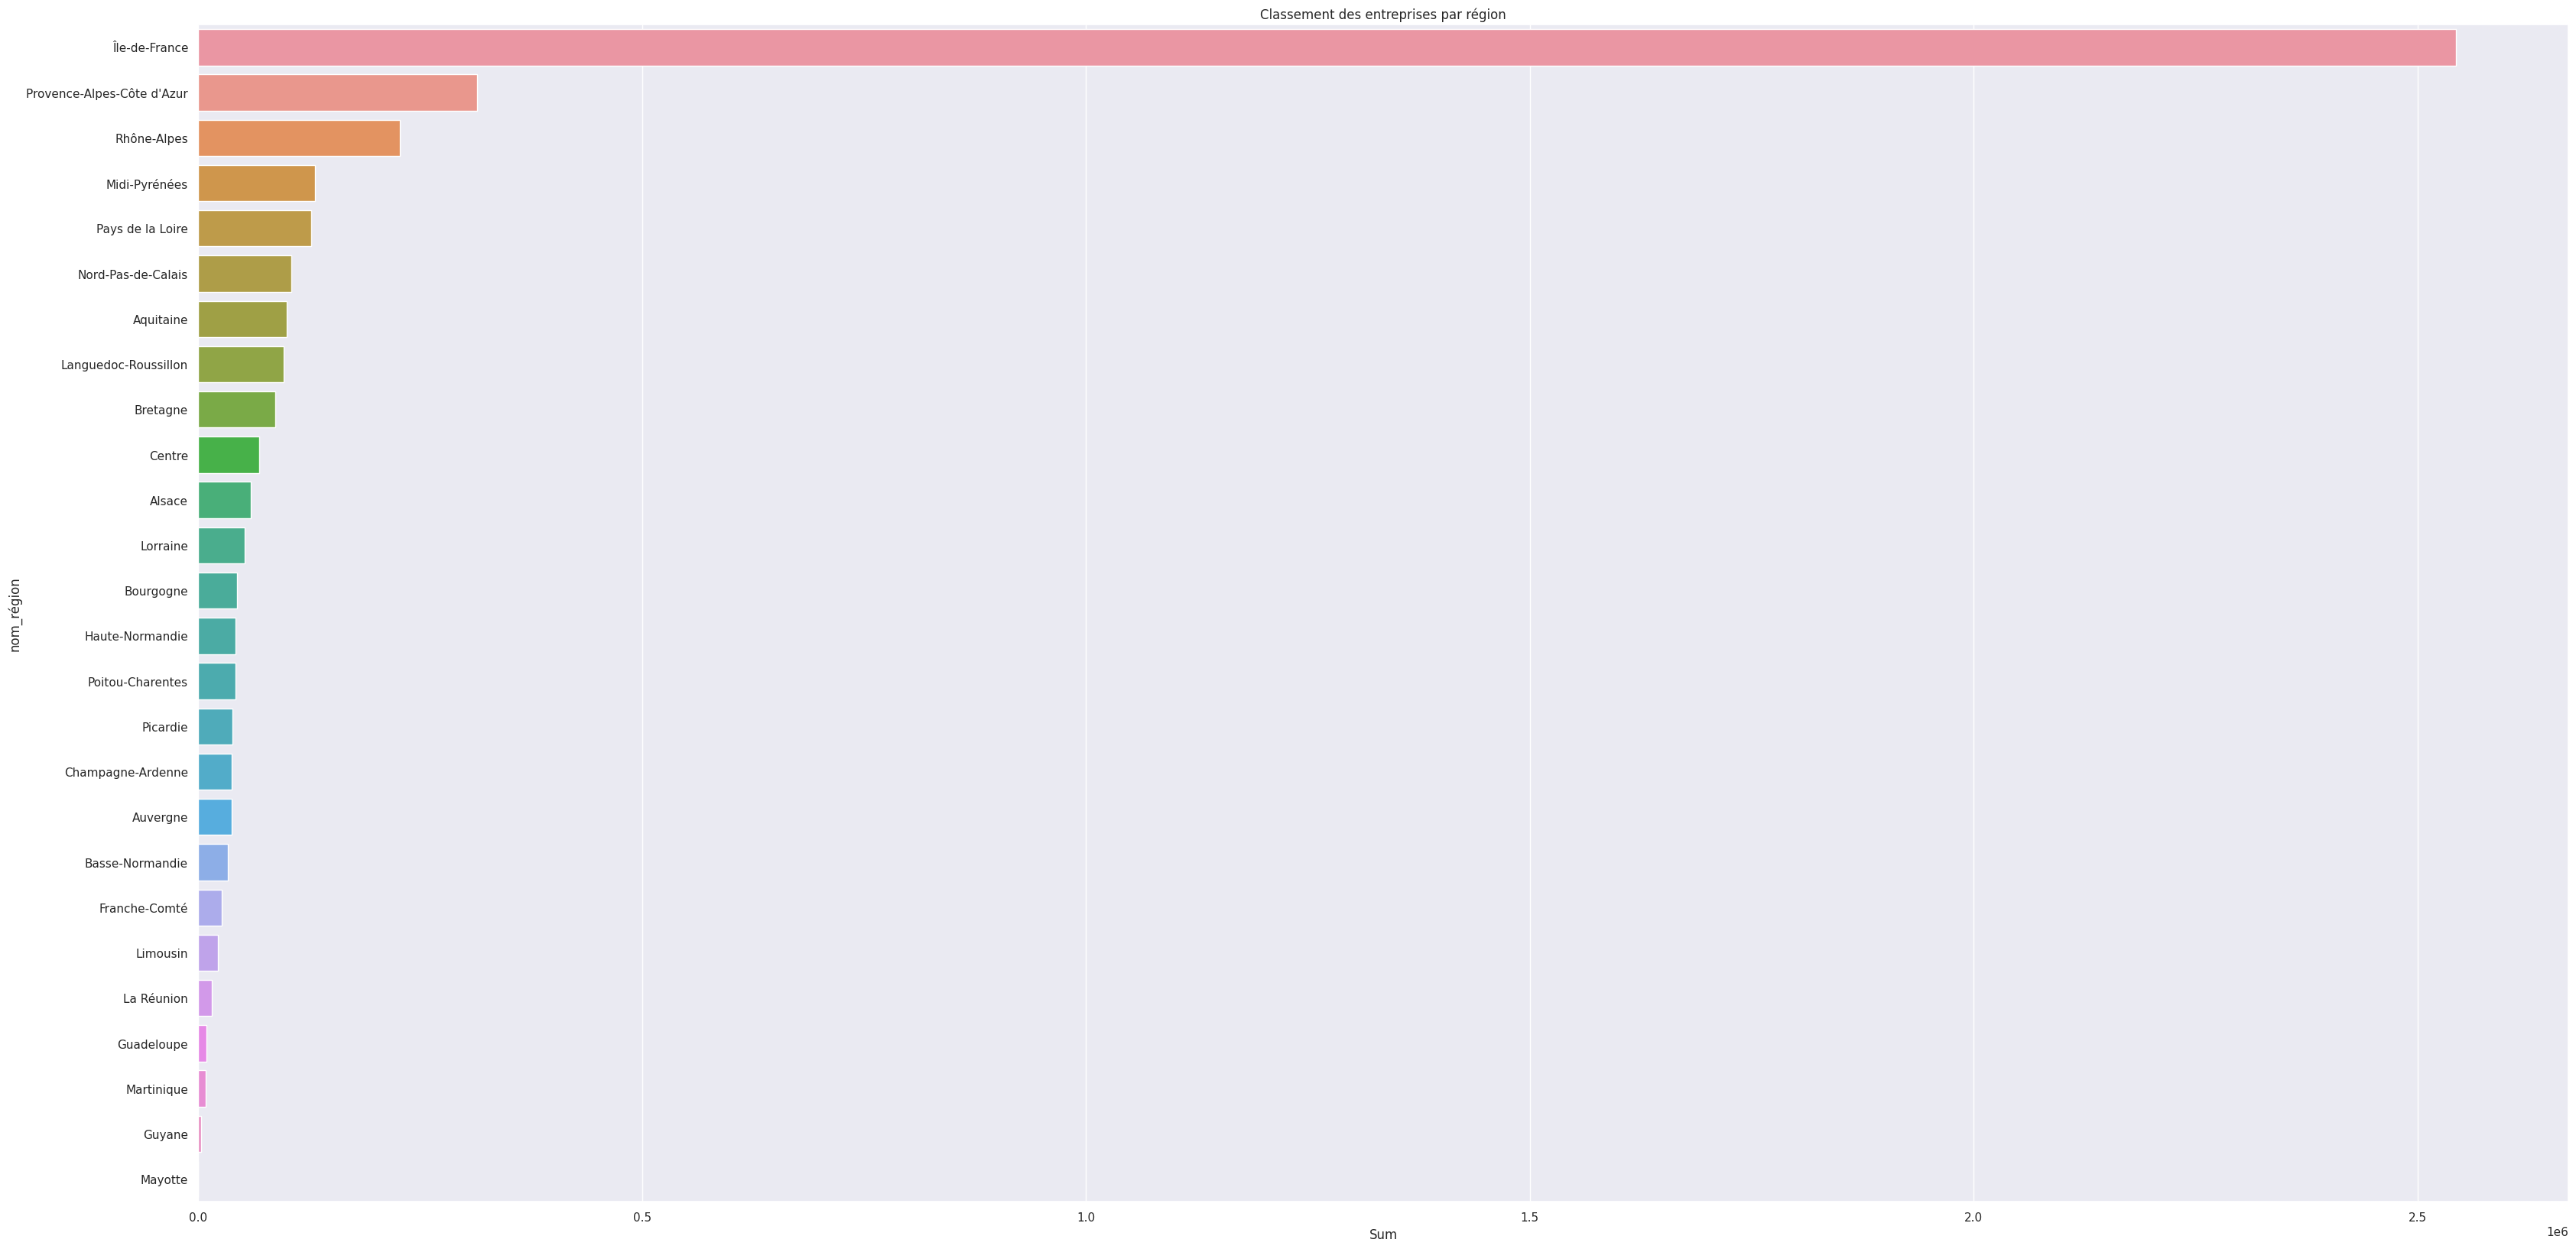

In [ ]:
# Instanciation d'un barplot :
plt.figure(figsize=(40, 20))
plt.title(label = 'Classement des entreprises par région')
sns.barplot(y= regions['nom_région'], x = regions['Sum'], data=regions);

ON MODIFIE LE DATASET GEO DANS LE BUT DE FAIRE UNE CARTE DE LA FRANCE :

In [ ]:
# On effectue les modification necessaire pour utiliser notre dataset :
geo["longitude"] = geo["longitude"].apply(lambda x: str(x).replace(',','.'))

mask = geo["longitude"] == '-'
geo.drop(geo[mask].index, inplace=True)

geo.dropna(subset = ["longitude", "latitude"], inplace=True)

geo["longitude"] = geo["longitude"].astype(float)

In [ ]:
geo.drop_duplicates(subset=["code_insee"], keep="first", inplace=True)

In [ ]:
def distance(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))

    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

def distance_bigger_than(limit, lon1, lat1, lon2, lat2):
    dist = distance(lon1, lat1, lon2, lat2)
    if dist > limit:
        return 0
    else:
        return 1

In [ ]:
# Extraction des coordonnées de Paris
paris_lat = geo.loc[geo['nom_commune'] == "Paris"].iloc[0]["latitude"]
paris_lon = geo.loc[geo['nom_commune'] == "Paris"].iloc[0]["longitude"]

distances = []

# calcule des valeurs de PARIS_CLOSE
for index, row in geo.iterrows():
    distances.append(distance_bigger_than(30, row["longitude"], row["latitude"], paris_lon, paris_lat))

# ajout de la nouvelle colonne a notre dataframe
geo["PARIS_CLOSE"] = pd.Series(distances, index=geo.index)

In [ ]:
# Extraction des coordonnée des grandes villes
majors =  geo[geo["nom_commune"] == geo["chef.lieu_région"]]
major_lats = majors["latitude"].tolist()
major_lons = majors["longitude"].tolist()

distances = []

# calcule des valeurs de MAJOR_CITY_DISTANCE
for index, row in geo.iterrows():

    single_distances = []
    for lat, lon in zip(major_lats, major_lons):
        single_distances.append(int(distance(row["longitude"], row["latitude"], lon, lat)))

    distances.append(min(single_distances))

# ajout de la nouvelle colonne a notre dataframe
geo["MAJOR_CITY_DISTANCE"] = pd.Series(distances, index=geo.index)

Creation d'un dataset avec seulement la colonne E14TST

In [ ]:
total_entreprise = entreprise[['CODGEO','LIBGEO', 'REG', 'DEP', 'E14TST']]

In [ ]:
total_entreprise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36321 entries, 0 to 36680
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CODGEO  36321 non-null  int64 
 1   LIBGEO  36321 non-null  object
 2   REG     36321 non-null  int64 
 3   DEP     36321 non-null  int64 
 4   E14TST  36321 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


In [ ]:
total_entreprise_geo = total_entreprise.merge(geo, how = 'left', left_on = 'CODGEO', right_on = 'code_insee')

AJOUT DU DATASET DEPARTEMENTS (AFIN DE DIVISER NOTRE CARTE DE LA FRANCE EN DEPARTEMENTS)

In [ ]:
#Visualisation
departements.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   code      96 non-null     object  
 1   nom       96 non-null     object  
 2   geometry  96 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 2.4+ KB


In [ ]:
# On regroupe par département en faisant la somme
entreprises_par_dep = total_entreprise_geo.groupby("numéro_département").sum()
# On regroupe avec le dataset departements
departements_entre = departements.merge(entreprises_par_dep, how="left", left_on="code", right_index=True)

<ipython-input-38-dee82b004aa8>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
departements_entre.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   code                    96 non-null     object  
 1   nom                     96 non-null     object  
 2   geometry                96 non-null     geometry
 3   CODGEO                  94 non-null     float64 
 4   REG                     94 non-null     float64 
 5   DEP                     94 non-null     float64 
 6   E14TST                  94 non-null     float64 
 7   code_région             94 non-null     float64 
 8   numéro_circonscription  94 non-null     float64 
 9   code_insee              94 non-null     float64 
 10  latitude                94 non-null     float64 
 11  longitude               94 non-null     float64 
 12  éloignement             94 non-null     float64 
 13  PARIS_CLOSE             94 non-null     float64 
 14  MAJOR_CITY_DISTANCE 

In [ ]:
# On enleve les valeurs manquantes
departements_entre.dropna(subset = ["latitude", "longitude"], inplace=True)

In [ ]:
entreprises_par_dep.head()

,CODGEO,REG,DEP,E14TST,code_région,numéro_circonscription,code_insee,latitude,longitude,éloignement,PARIS_CLOSE,MAJOR_CITY_DISTANCE
numéro_département,,,,,,,,,,,,
01,479309,32062,391,32624,32062.0,1051.0,479309.0,18019.166664,2086.725002,581.02,0.0,22960.0
02,1853999,16852,1532,22171,16852.0,2365.0,1853999.0,37954.041672,2703.475536,1161.15,0.0,60355.0
03,942057,24734,894,19177,24734.0,764.0,942057.0,13813.941668,946.091671,464.01,0.0,21029.0
04,733823,16554,712,12441,16554.0,267.0,733823.0,7844.966667,1090.083327,269.98,0.0,18822.0
05,753951,13764,740,13501,13764.0,213.0,753951.0,6596.545137,904.791508,207.40,0.0,21759.0


In [ ]:
entreprises_par_dep.reset_index(level=0, inplace=True)

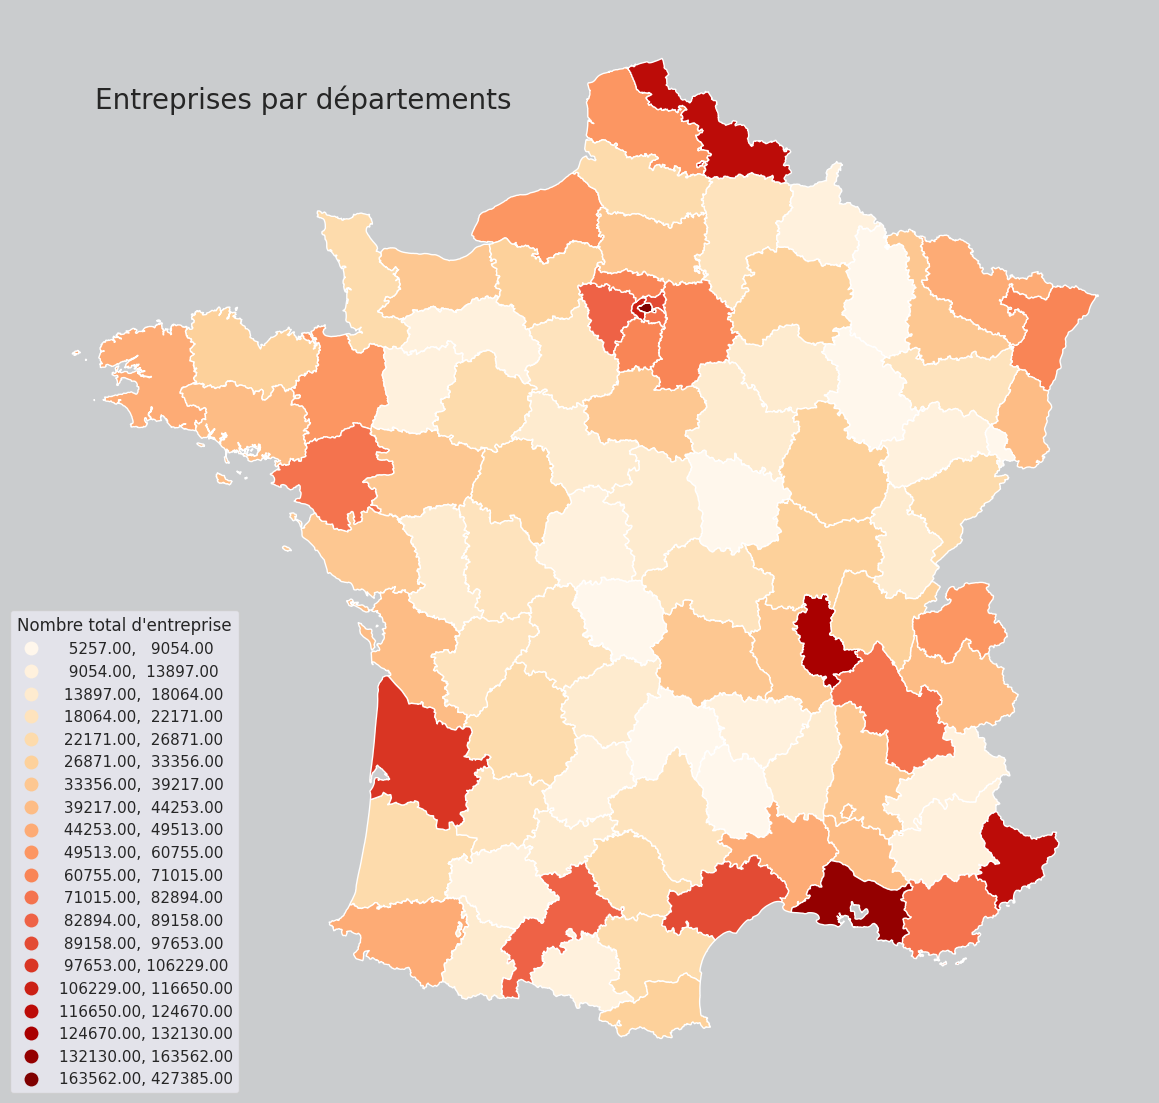

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,14))
ax.set_title('Entreprises par départements', size=20, x = 0.25, y=0.90)
fig.patch.set_facecolor((202/255, 204/255, 206/255))
departements_entre.plot(ax=ax, column="E14TST", cmap=plt.cm.OrRd, scheme='fisher_jenks', k=20, legend=True)
leg = ax.get_legend()
ax.set_axis_off()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.45))
leg.set_title("Nombre total d'entreprise")

VISUALISATION DU DATASET SALAIRE

CREATION D'UN NVX DATAFRAME :

In [ ]:
# Création d'un nouveau dataframe en separant par tranche d'age et sexe
new_age = {}
new_age["SNHMF1814"] = {"Genre": 1, "Tranche_age": '18-25'}
new_age["SNHMF2614"] = {"Genre": 1, "Tranche_age": '26-50'}
new_age["SNHMF5014"] = {"Genre": 1, "Tranche_age": '> 50'}
new_age["SNHMH1814"] = {"Genre": 2, "Tranche_age": '18-25'}
new_age["SNHMH2614"] = {"Genre": 2, "Tranche_age": '26-50'}
new_age["SNHMH5014"] = {"Genre": 2, "Tranche_age": '> 50'}

reformatted_salaire = []
for index, row in salaire.iterrows():
    for key, value in new_age.items():
        row_dict = {}
        row_dict["CODGEO"] = row["CODGEO"]
        row_dict["Genre"] = value["Genre"]
        row_dict["Tranche_age"] = value["Tranche_age"]
        row_dict["Salaire"] = row[key]
        reformatted_salaire.append(row_dict)

new_salaire_age = pd.DataFrame(reformatted_salaire)

In [ ]:
new_salaire_age.head()

,CODGEO,Genre,Tranche_age,Salaire
0,1004,1,18-25,9.7
1,1004,1,26-50,11.8
2,1004,1,> 50,12.5
3,1004,2,18-25,11.0
4,1004,2,26-50,14.9


(0.0, 20.0)

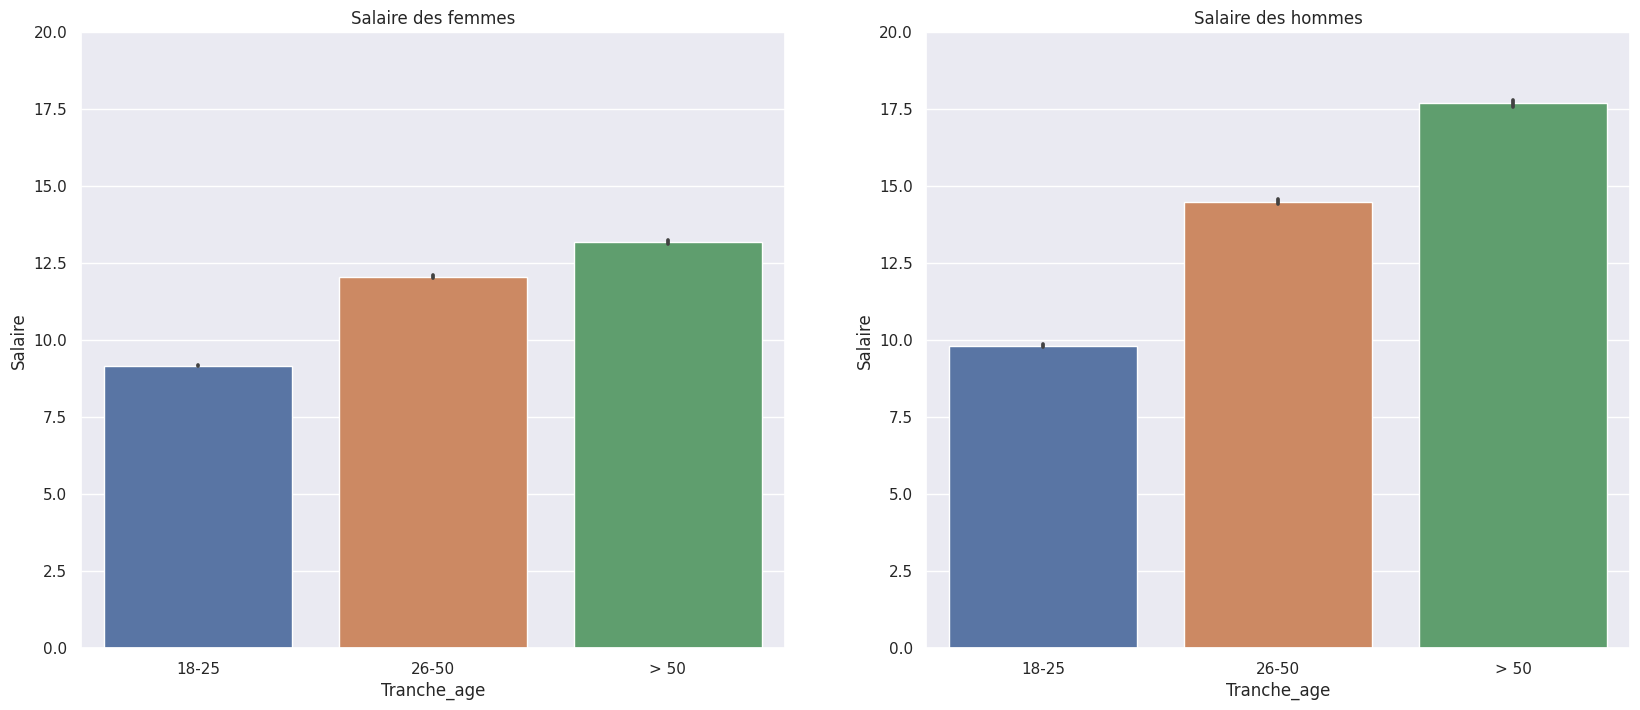

In [ ]:
# Graphique montrant les différences de salaires entre les hommes et les femmes par tranche d'âge

Salaire_F = new_salaire_age.loc[(new_salaire_age['Genre'] == 1)]
Salaire_H = new_salaire_age.loc[(new_salaire_age['Genre'] == 2)]

plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.title(label = 'Salaire des femmes')
sns.barplot(x= Salaire_F['Tranche_age'], y = Salaire_F['Salaire'], data=Salaire_F);
plt.ylim([0, 20])

plt.subplot(122)
plt.title(label = 'Salaire des hommes')
sns.barplot(x= Salaire_H['Tranche_age'], y =Salaire_H ['Salaire'], data=Salaire_H);
plt.ylim([0, 20])

In [ ]:
# Création d'un nouveau dataframe en separant par sexe et poste :
new = {}
new["SNHMFC14"] = {"Genre": 1, "Poste": 4}
new["SNHMFP14"] = {"Genre": 1, "Poste": 3}
new["SNHMFE14"] = {"Genre": 1, "Poste": 2}
new["SNHMFO14"] = {"Genre": 1, "Poste": 1}
new["SNHMHC14"] = {"Genre": 2, "Poste": 4}
new["SNHMHP14"] = {"Genre": 2, "Poste": 3}
new["SNHMHE14"] = {"Genre": 2, "Poste": 2}
new["SNHMHO14"] = {"Genre": 2, "Poste": 1}

reformatted_salaire = []
for index, row in salaire.iterrows():
    for key, value in new.items():
        row_dict = {}
        row_dict["CODGEO"] = row["CODGEO"]
        row_dict["Genre"] = value["Genre"]
        row_dict["Poste"] = value["Poste"]
        row_dict["Salaire"] = row[key]
        reformatted_salaire.append(row_dict)

new_salaire = pd.DataFrame(reformatted_salaire)

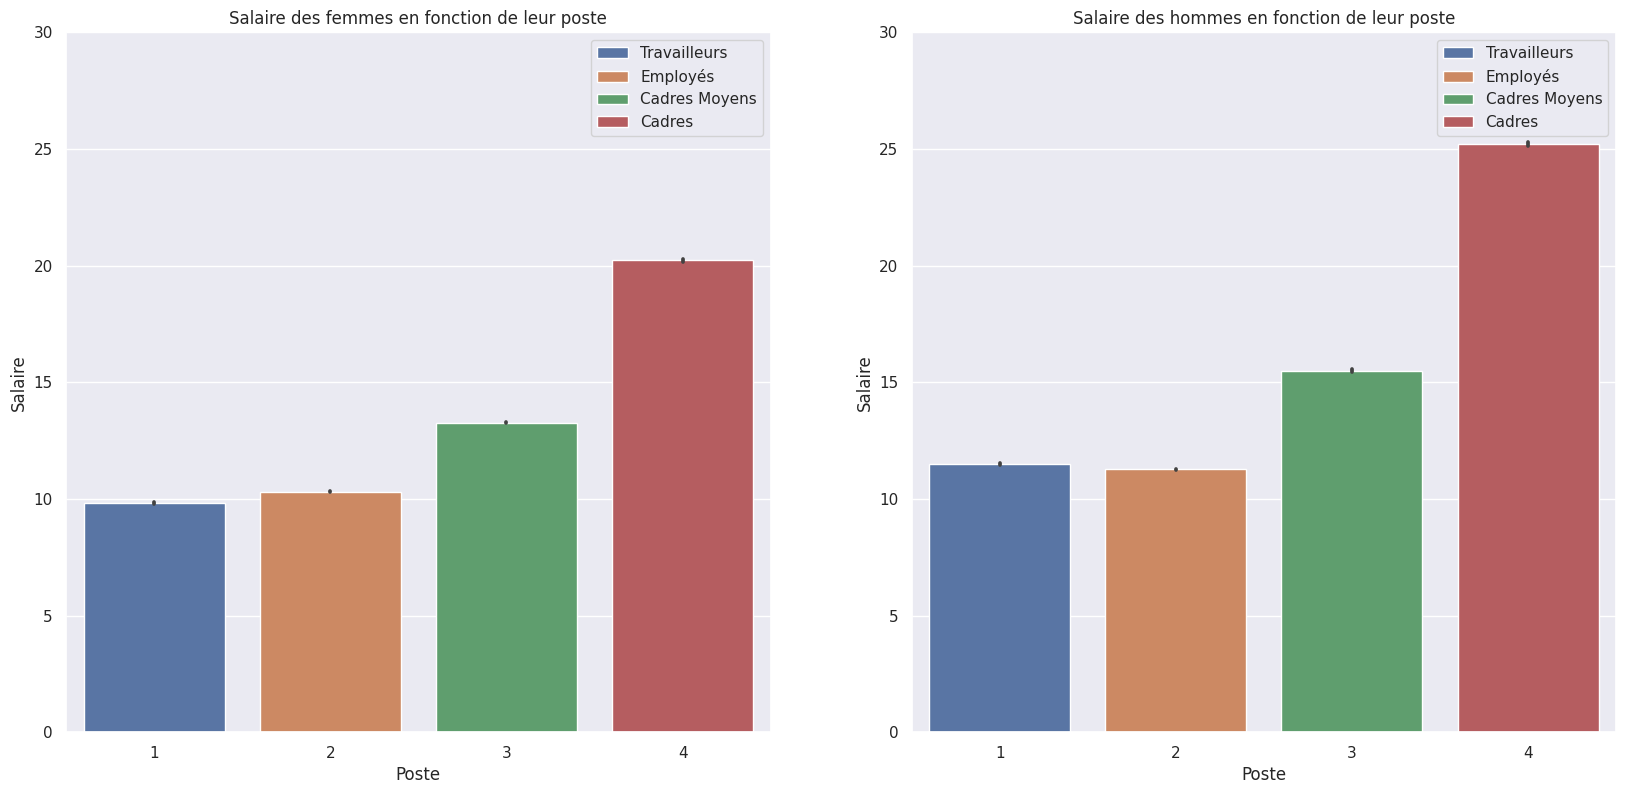

In [ ]:
# Graphique montrant les différences de salaires entre les hommes et les femmes en fonction du poste
job_F = new_salaire.loc[(new_salaire['Genre'] == 1)]
job_H = new_salaire.loc[(new_salaire['Genre'] == 2)]

plt.figure(figsize=(20, 20))

plt.subplot(221)
plt.title(label = 'Salaire des femmes en fonction de leur poste')
sns.barplot(x= job_F['Poste'], y = job_F['Salaire'], data=job_F, label = ['Travailleurs', 'Employés', 'Cadres Moyens', 'Cadres']);
plt.ylim([0, 30])
plt.legend()

plt.subplot(222)
plt.title(label = 'Salaire des hommes en fonction de leur poste')
sns.barplot(x= job_H['Poste'], y =job_H ['Salaire'], data=job_H, label = ['Travailleurs', 'Employés', 'Cadres Moyens', 'Cadres']);
plt.ylim([0, 30])
plt.legend()

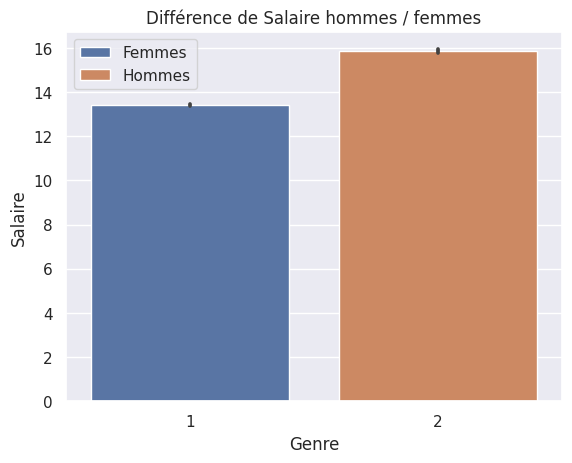

In [ ]:
plt.title(label='Différence de Salaire hommes / femmes')
sns.barplot(x = new_salaire['Genre'], y = new_salaire['Salaire'], data=new_salaire,label = ['Femmes', 'Hommes']);
plt.legend()

CREATION DE LA CARTE DE LA FRANCE CETTE FOIS CI POUR LES SALAIRES :

In [ ]:
# On assemble salaire avec geo
salaire_location = salaire.merge(geo, how="left", left_on='CODGEO', right_on="code_insee")

In [ ]:
# On regroupe la dataframe par departement :
salaires_par_dep = salaire_location.groupby("numéro_département").mean()
# On regroupe avec de dataset departements :
departements_salaire = departements.merge(salaires_par_dep, how="left", left_on="code", right_index=True)
# On supprime les valaeurs manquantes :
departements_salaire.dropna(subset = ["longitude"], inplace=True)

<ipython-input-51-eff2da59f198>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



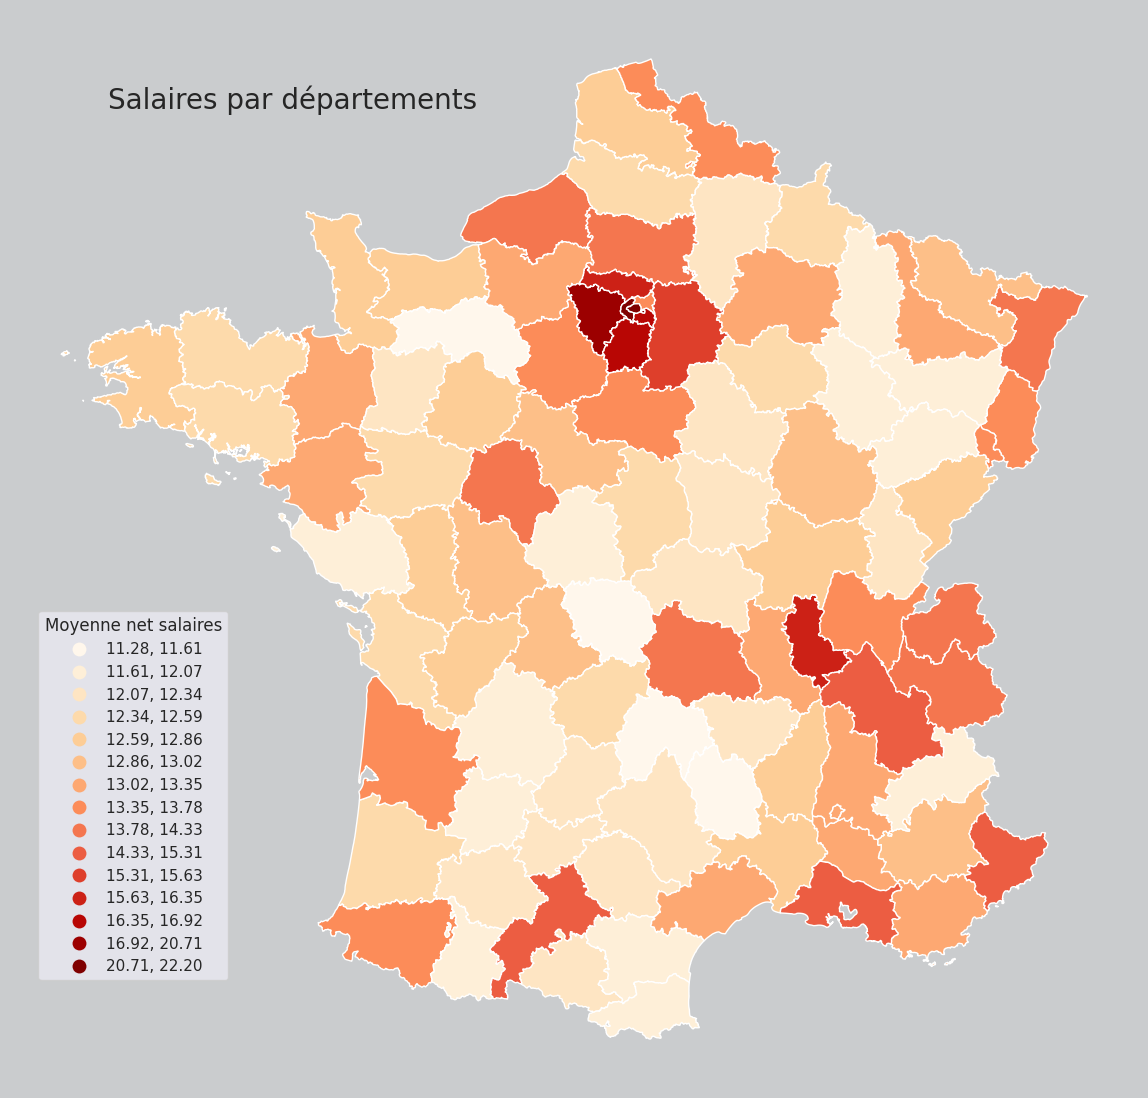

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,14))
ax.set_title('Salaires par départements', size=20, x = 0.25, y=0.90)
fig.patch.set_facecolor((202/255, 204/255, 206/255))
departements_salaire.plot(ax=ax, column="SNHM14", cmap=plt.cm.OrRd, scheme='fisher_jenks', k=15, legend=True)
leg = ax.get_legend()
ax.set_axis_off()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.45))
leg.set_title("Moyenne net salaires")

Visualisation par rapport à la distance des grandes villes

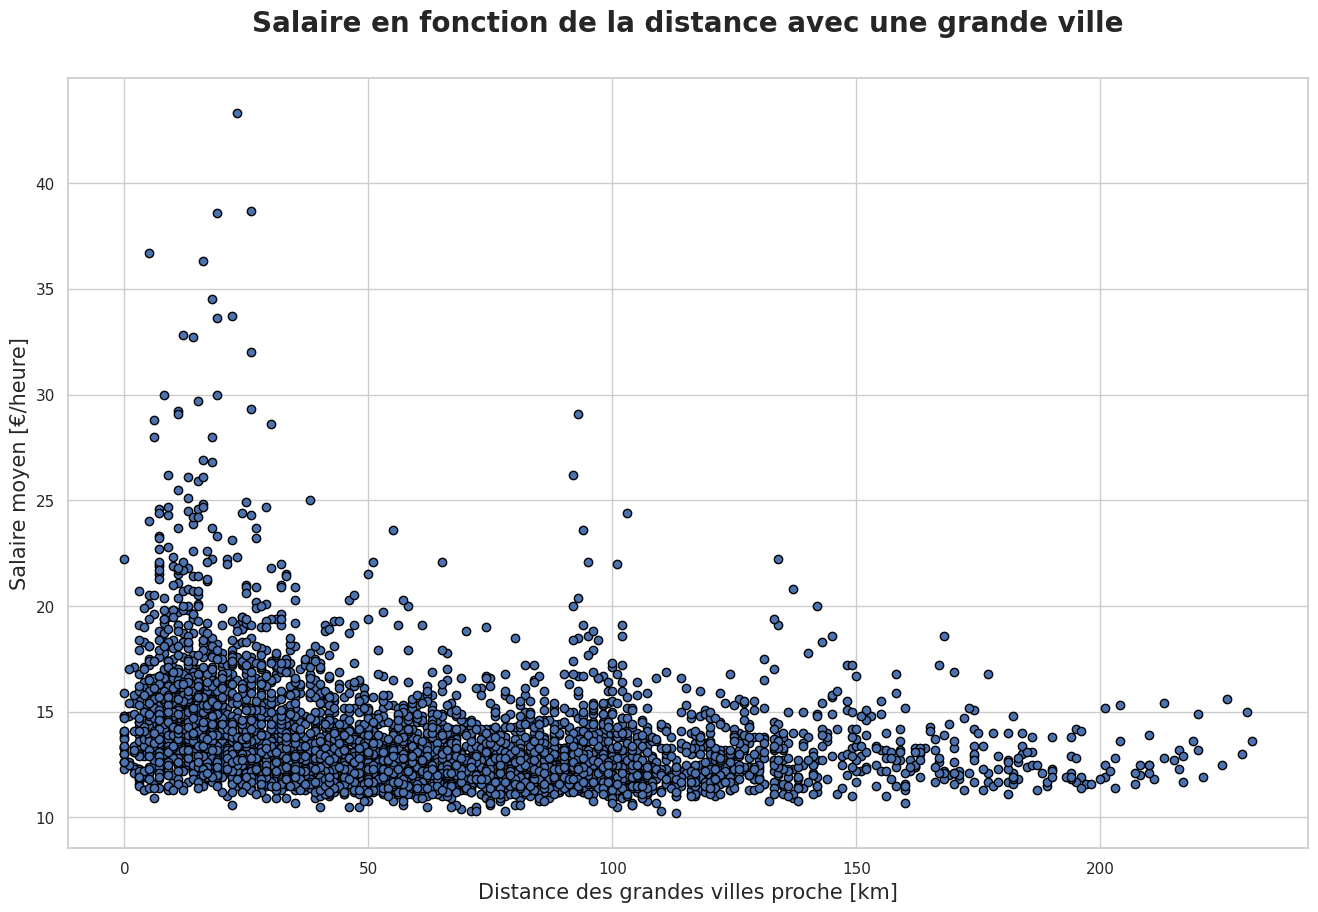

In [ ]:
plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
plt.title('Salaire en fonction de la distance avec une grande ville', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Distance des grandes villes proche [km]', fontsize=15)
plt.ylabel('Salaire moyen [€/heure]', fontsize=15)

years = salaire_location["MAJOR_CITY_DISTANCE"].values
memory = salaire_location["SNHM14"].values

plt.scatter(years, memory, edgecolors='black')
plt.show()

ANALYSES STATISTIQUES

DATASET SALAIRE :

In [ ]:
print('INDICATEURS RECAPITULATIF DU DF SALARY :', '\n')
print('SALAIRE NET MOYEN Femme')
print("la valeur minimale est :", salaire['SNHMF14'].min())
print("la valeur maximale est :", salaire['SNHMF14'].max())
print("la valeur mediane est :", salaire['SNHMF14'].median(), '\n')

q1, q2, q3 = salaire['SNHMF14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN Femme : CADRES')
print("la valeur minimale est :", salaire['SNHMFC14'].min())
print("la valeur maximale est :", salaire['SNHMFC14'].max())
print("la valeur mediane est :", salaire['SNHMFC14'].median(), '\n')

q1, q2, q3 = salaire['SNHMFC14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN Femme : CADRES MOYEN')
print("la valeur minimale est :", salaire['SNHMFP14'].min())
print("la valeur maximale est :", salaire['SNHMFP14'].max())
print("la valeur mediane est :", salaire['SNHMFP14'].median(), '\n')

q1, q2, q3 = salaire['SNHMFP14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN Femme: EMPLOYES')
print("la valeur minimale est :", salaire['SNHMFE14'].min())
print("la valeur maximale est :", salaire['SNHMFE14'].max())
print("la valeur mediane est :", salaire['SNHMFE14'].median(), '\n')

q1, q2, q3 =salaire['SNHMFE14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN Femme: TRAVAILLEURS')
print("la valeur minimale est :", salaire['SNHMFO14'].min())
print("la valeur maximale est :", salaire['SNHMFO14'].max())
print("la valeur mediane est :", salaire['SNHMFO14'].median(), '\n')

q1, q2, q3 = salaire['SNHMFO14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('INDICATEURS RECAPITULATIF DU DF SALARY :', '\n')
print('SALAIRE NET MOYEN Homme')
print("la valeur minimale est :", salaire['SNHMH14'].min())
print("la valeur maximale est :", salaire['SNHMH14'].max())
print("la valeur mediane est :", salaire['SNHMH14'].median(), '\n')

q1, q2, q3 = salaire['SNHMH14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN Homme: CADRES')
print("la valeur minimale est :", salaire['SNHMHC14'].min())
print("la valeur maximale est :", salaire['SNHMHC14'].max())
print("la valeur mediane est :", salaire['SNHMHC14'].median(), '\n')

q1, q2, q3 = salaire['SNHMHC14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN Homme: CADRES MOYEN')
print("la valeur minimale est :", salaire['SNHMHP14'].min())
print("la valeur maximale est :", salaire['SNHMHP14'].max())
print("la valeur mediane est :", salaire['SNHMHP14'].median(), '\n')

q1, q2, q3 = salaire['SNHMHP14'].quantile(q=[0.25, 0.5, 0.75])

print('SALAIRE NET MOYEN Homme: EMPLOYE')
print("la valeur minimale est :", salaire['SNHMHE14'].min())
print("la valeur maximale est :", salaire['SNHMHE14'].max())
print("la valeur mediane est :", salaire['SNHMHE14'].median(), '\n')

q1, q2, q3 =salaire['SNHMHE14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN Homme : TRAVAILLEUR')
print("la valeur minimale est :", salaire['SNHMHO14'].min())
print("la valeur maximale est :", salaire['SNHMHO14'].max())
print("la valeur mediane est :", salaire['SNHMHO14'].median(), '\n')

q1, q2, q3 = salaire['SNHMHO14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

INDICATEURS RECAPITULATIF DU DF SALARY : 

SALAIRE NET MOYEN Femme
la valeur minimale est : 9.3
la valeur maximale est : 26.7
la valeur mediane est : 11.5 

les quartiles sont : q1 = 10.9  / q2 =  11.5  / q3 =  12.7 

SALAIRE NET MOYEN Femme : CADRES
la valeur minimale est : 12.0
la valeur maximale est : 35.5
la valeur mediane est : 20.0 

les quartiles sont : q1 = 18.8  / q2 =  20.0  / q3 =  21.4 

SALAIRE NET MOYEN Femme : CADRES MOYEN
la valeur minimale est : 10.6
la valeur maximale est : 19.0
la valeur mediane est : 13.1 

les quartiles sont : q1 = 12.6  / q2 =  13.1  / q3 =  13.8 

SALAIRE NET MOYEN Femme: EMPLOYES
la valeur minimale est : 8.7
la valeur maximale est : 16.1
la valeur mediane est : 10.1 

les quartiles sont : q1 = 9.8  / q2 =  10.1  / q3 =  10.6 

SALAIRE NET MOYEN Femme: TRAVAILLEURS
la valeur minimale est : 6.1
la valeur maximale est : 28.1
la valeur mediane est : 9.7 

les quartiles sont : q1 = 9.3  / q2 =  9.7  / q3 =  10.2 

INDICATEURS RECAPITULATIF DU DF SALA

In [ ]:
salaire.std()

<ipython-input-55-1c1781e208b0>:1: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



CODGEO       25781.402402
SNHM14           2.562868
SNHMC14          2.836451
SNHMP14          1.487597
SNHME14          0.812953
SNHMO14          1.224076
SNHMF14          1.790723
SNHMFC14         2.327173
SNHMFP14         0.990423
SNHMFE14         0.748591
SNHMFO14         1.105178
SNHMH14          3.179361
SNHMHC14         3.419736
SNHMHP14         2.371597
SNHMHE14         1.145554
SNHMHO14         1.291991
SNHM1814         0.997259
SNHM2614         2.365774
SNHM5014         3.591603
SNHMF1814        0.453437
SNHMF2614        1.827818
SNHMF5014        2.252915
SNHMH1814        1.538884
SNHMH2614        2.855326
SNHMH5014        4.536457
dtype: float64

In [ ]:

print('SALAIRE NET MOYEN Femme: 18-25')
print("la valeur minimale est :", salaire['SNHMF1814'].min())
print("la valeur maximale est :", salaire['SNHMF1814'].max())
print("la valeur mediane est :", salaire['SNHMF1814'].median(), '\n')

q1, q2, q3 = salaire['SNHMF1814'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN Femme: 26-50 ')
print("la valeur minimale est :", salaire['SNHMF2614'].min())
print("la valeur maximale est :", salaire['SNHMF2614'].max())
print("la valeur mediane est :", salaire['SNHMF2614'].median(), '\n')

q1, q2, q3 = salaire['SNHMF2614'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN Femme: 50 et +')
print("la valeur minimale est :", salaire['SNHMF5014'].min())
print("la valeur maximale est :", salaire['SNHMF5014'].max())
print("la valeur mediane est :", salaire['SNHMF5014'].median(), '\n')

q1, q2, q3 = salaire['SNHMF5014'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')


print('SALAIRE NET MOYEN Homme : 18-25')
print("la valeur minimale est :", salaire['SNHMH1814'].min())
print("la valeur maximale est :", salaire['SNHMH1814'].max())
print("la valeur mediane est :", salaire['SNHMH1814'].median(), '\n')

q1, q2, q3 = salaire['SNHMH1814'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN Homme : 26-50')
print("la valeur minimale est :", salaire['SNHMH2614'].min())
print("la valeur maximale est :", salaire['SNHMH2614'].max())
print("la valeur mediane est :", salaire['SNHMH2614'].median(), '\n')

q1, q2, q3 = salaire['SNHMH2614'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN Homme: 50 et +')
print("la valeur minimale est :", salaire['SNHMH5014'].min())
print("la valeur maximale est :", salaire['SNHMH5014'].max())
print("la valeur mediane est :", salaire['SNHMH5014'].median(), '\n')

q1, q2, q3 = salaire['SNHMH5014'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

SALAIRE NET MOYEN Femme: 18-25
la valeur minimale est : 7.5
la valeur maximale est : 12.0
la valeur mediane est : 9.1 

les quartiles sont : q1 = 8.9  / q2 =  9.1  / q3 =  9.4 

SALAIRE NET MOYEN Femme: 26-50 
la valeur minimale est : 9.1
la valeur maximale est : 26.6
la valeur mediane est : 11.6 

les quartiles sont : q1 = 10.9  / q2 =  11.6  / q3 =  12.7 

SALAIRE NET MOYEN Femme: 50 et +
la valeur minimale est : 9.5
la valeur maximale est : 31.0
la valeur mediane est : 12.6 

les quartiles sont : q1 = 11.7  / q2 =  12.6  / q3 =  14.0 

SALAIRE NET MOYEN Homme : 18-25
la valeur minimale est : 7.8
la valeur maximale est : 93.3
la valeur mediane est : 9.7 

les quartiles sont : q1 = 9.4  / q2 =  9.7  / q3 =  10.0 

SALAIRE NET MOYEN Homme : 26-50
la valeur minimale est : 9.6
la valeur maximale est : 45.4
la valeur mediane est : 13.8 

les quartiles sont : q1 = 12.7  / q2 =  13.8  / q3 =  15.5 

SALAIRE NET MOYEN Homme: 50 et +
la valeur minimale est : 10.8
la valeur maximale est : 68.6

In [ ]:
print('INDICATEURS RECAPITULATIF DU DF SALARY :', '\n')
print('SALAIRE NET MOYEN')
print("la valeur minimale est :", salaire['SNHM14'].min())
print("la valeur maximale est :", salaire['SNHM14'].max())
print("la valeur mediane est :", salaire['SNHM14'].median(), '\n')

q1, q2, q3 = salaire['SNHM14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN : CADRES')
print("la valeur minimale est :", salaire['SNHMC14'].min())
print("la valeur maximale est :", salaire['SNHMC14'].max())
print("la valeur mediane est :", salaire['SNHMC14'].median(), '\n')

q1, q2, q3 = salaire['SNHMC14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN : CADRES MOYEN')
print("la valeur minimale est :", salaire['SNHMP14'].min())
print("la valeur maximale est :", salaire['SNHMP14'].max())
print("la valeur mediane est :", salaire['SNHMP14'].median(), '\n')

q1, q2, q3 = salaire['SNHMP14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN : EMPLOYES')
print("la valeur minimale est :", salaire['SNHME14'].min())
print("la valeur maximale est :", salaire['SNHME14'].max())
print("la valeur mediane est :", salaire['SNHME14'].median(), '\n')

q1, q2, q3 = salaire['SNHME14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

print('SALAIRE NET MOYEN : TRAVAILLEURS')
print("la valeur minimale est :", salaire['SNHMO14'].min())
print("la valeur maximale est :", salaire['SNHMO14'].max())
print("la valeur mediane est :", salaire['SNHMO14'].median(), '\n')

q1, q2, q3 = salaire['SNHMO14'].quantile(q=[0.25, 0.5, 0.75])

print("les quartiles sont :", 'q1 =', q1, ' / q2 = ', q2, ' / q3 = ', q3, '\n')

INDICATEURS RECAPITULATIF DU DF SALARY : 

SALAIRE NET MOYEN
la valeur minimale est : 10.2
la valeur maximale est : 43.3
la valeur mediane est : 13.0 

les quartiles sont : q1 = 12.1  / q2 =  13.0  / q3 =  14.5 

SALAIRE NET MOYEN : CADRES
la valeur minimale est : 16.0
la valeur maximale est : 51.5
la valeur mediane est : 23.2 

les quartiles sont : q1 = 21.9  / q2 =  23.2  / q3 =  24.9 

SALAIRE NET MOYEN : CADRES MOYEN
la valeur minimale est : 11.6
la valeur maximale est : 54.6
la valeur mediane est : 14.4 

les quartiles sont : q1 = 13.8  / q2 =  14.4  / q3 =  15.1 

SALAIRE NET MOYEN : EMPLOYES
la valeur minimale est : 8.7
la valeur maximale est : 17.5
la valeur mediane est : 10.4 

les quartiles sont : q1 = 10.0  / q2 =  10.4  / q3 =  10.9 

SALAIRE NET MOYEN : TRAVAILLEURS
la valeur minimale est : 8.3
la valeur maximale est : 46.3
la valeur mediane est : 11.0 

les quartiles sont : q1 = 10.6  / q2 =  11.0  / q3 =  11.6 



In [ ]:
moyenne_X2 = salaire["SNHMF14"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMH14"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMFC14"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMHC14"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMFP14"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMHP14"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMFE14"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMHE14"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMFO14"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMHO14"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMF1814"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMH1814"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMF2614"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMH2614"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 =salaire["SNHMF5014"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

moyenne_X2 = salaire["SNHMH5014"].mean()
print("Moyenne calculée avec la commande python: ", moyenne_X2)
print("\n")

Moyenne calculée avec la commande python:  12.042294889367534


Moyenne calculée avec la commande python:  14.85549246132759


Moyenne calculée avec la commande python:  20.22637556295281


Moyenne calculée avec la commande python:  25.205149794399844


Moyenne calculée avec la commande python:  13.274877618954374


Moyenne calculée avec la commande python:  15.485940865478755


Moyenne calculée avec la commande python:  10.310456236538085


Moyenne calculée avec la commande python:  11.26908165263364


Moyenne calculée avec la commande python:  9.831838652829449


Moyenne calculée avec la commande python:  11.501546896416682


Moyenne calculée avec la commande python:  9.162580771490111


Moyenne calculée avec la commande python:  9.819404738594086


Moyenne calculée avec la commande python:  12.060328960250636


Moyenne calculée avec la commande python:  14.493792833365966


Moyenne calculée avec la commande python:  13.175797924417466


Moyenne calculée avec la commande python:  17.

In [ ]:
salaire.corr()

<ipython-input-59-b122ad98dba6>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,CODGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,SNHMFE14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
CODGEO,1.000000,0.204718,0.165343,0.171278,0.292007,0.210882,0.262459,0.206232,0.278544,0.322328,...,0.204455,0.112296,0.207749,0.200382,0.268813,0.258122,0.269033,0.072987,0.177883,0.170865
SNHM14,0.204718,1.000000,0.828557,0.707432,0.880052,0.809375,0.957973,0.686053,0.779245,0.844058,...,0.786115,0.392305,0.989773,0.977038,0.596756,0.951318,0.909694,0.313004,0.982953,0.962725
SNHMC14,0.165343,0.828557,1.000000,0.566357,0.663934,0.621516,0.758724,0.752306,0.632099,0.633670,...,0.608491,0.260170,0.794384,0.853033,0.439448,0.743499,0.736093,0.200402,0.799928,0.865067
SNHMP14,0.171278,0.707432,0.566357,1.000000,0.601725,0.593551,0.627193,0.460957,0.640287,0.583121,...,0.580723,0.504556,0.713430,0.659426,0.422338,0.621798,0.598864,0.459202,0.730457,0.647314
SNHME14,0.292007,0.880052,0.663934,0.601725,1.000000,0.727686,0.914169,0.608020,0.795266,0.959078,...,0.703383,0.337541,0.887402,0.844823,0.626752,0.907966,0.873258,0.249618,0.858816,0.808799
SNHMO14,0.210882,0.809375,0.621516,0.593551,0.727686,1.000000,0.737088,0.494604,0.599777,0.685932,...,0.992211,0.300812,0.801646,0.777452,0.492921,0.735095,0.687747,0.232891,0.802537,0.760127
SNHMF14,0.262459,0.957973,0.758724,0.627193,0.914169,0.737088,1.000000,0.724704,0.845618,0.911465,...,0.705070,0.359794,0.957193,0.934384,0.655194,0.990535,0.963142,0.268536,0.923038,0.899538
SNHMFC14,0.206232,0.686053,0.752306,0.460957,0.608020,0.494604,0.724704,1.000000,0.598325,0.602504,...,0.480208,0.230283,0.672391,0.690199,0.435629,0.706583,0.726052,0.169746,0.643633,0.662770
SNHMFP14,0.278544,0.779245,0.632099,0.640287,0.795266,0.599777,0.845618,0.598325,1.000000,0.809801,...,0.573642,0.291829,0.780932,0.760376,0.581332,0.831062,0.831382,0.207585,0.742884,0.718646
SNHMFE14,0.322328,0.844058,0.633670,0.583121,0.959078,0.685932,0.911465,0.602504,0.809801,1.000000,...,0.660394,0.332333,0.853357,0.812641,0.648647,0.904463,0.878910,0.239652,0.813942,0.769770


DATSET : ENTREPRISE

In [ ]:
entreprise_stat = entreprise[['LIBGEO','CODGEO','DEP', 'E14TST', 'E14TS1', 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200', 'E14TS500' ]]

In [ ]:
entreprise_stat.describe()

,CODGEO,DEP,E14TST,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
count,36321.000000,36321.000000,36321.000000,36321.000000,36321.000000,36321.000000,36321.000000,36321.000000,36321.000000,36321.000000,36321.000000
mean,46521.041051,49.379450,123.721704,27.346659,5.237218,3.814956,2.308004,0.743317,0.334627,0.174197,0.048897
std,25513.105550,60.670573,2364.619186,434.069122,84.078419,61.250534,32.753222,9.929839,4.873106,2.797187,1.096414
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25269.000000,25.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49159.000000,49.000000,19.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67106.000000,67.000000,54.000000,11.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,97617.000000,976.000000,427385.000000,76368.000000,14836.000000,10829.000000,5643.000000,1658.000000,812.000000,456.000000,180.000000


In [ ]:
entreprise.corr()

<ipython-input-62-1e71302a6db9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,CODGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,...,E14TS500,Micro,Petite,Medium,Large,Sum,Micro%,Petite%,Medium%,Large%
CODGEO,1.000000,-0.235811,0.522431,0.019571,0.018731,0.020703,0.023164,0.022557,0.025854,0.027849,...,0.032212,0.021108,0.023728,0.028900,0.033841,0.021786,-0.038113,0.031592,0.020410,0.024246
REG,-0.235811,1.000000,-0.192216,-0.002702,-0.002788,-0.000909,-0.004880,-0.004687,-0.006720,-0.007969,...,-0.022938,-0.001554,-0.005401,-0.010209,-0.020890,-0.002451,0.060555,-0.050688,-0.033505,-0.031124
DEP,0.522431,-0.192216,1.000000,0.032994,0.034467,0.028586,0.031875,0.027429,0.027236,0.025899,...,0.013123,0.029127,0.027388,0.025453,0.018318,0.028752,-0.015118,0.014153,0.004459,0.006059
E14TST,0.019571,-0.002702,0.032994,1.000000,0.999491,0.996478,0.995310,0.993965,0.984422,0.969650,...,0.925073,0.996546,0.991587,0.969969,0.946001,0.996114,-0.015512,0.012143,0.010651,0.009293
E14TS0ND,0.018731,-0.002788,0.034467,0.999491,1.000000,0.993423,0.992000,0.990592,0.979347,0.963118,...,0.921990,0.993449,0.987617,0.963663,0.940968,0.992795,-0.012882,0.010032,0.008904,0.008007
E14TS1,0.020703,-0.000909,0.028586,0.996478,0.993423,1.000000,0.998099,0.996228,0.990087,0.978461,...,0.923423,0.999950,0.995039,0.977954,0.949385,0.999636,-0.018655,0.014562,0.012985,0.011029
E14TS6,0.023164,-0.004880,0.031875,0.995310,0.992000,0.998099,1.000000,0.998604,0.994114,0.983247,...,0.929838,0.998665,0.997993,0.982951,0.956049,0.999178,-0.023690,0.018712,0.016049,0.013373
E14TS10,0.022557,-0.004687,0.027429,0.993965,0.990592,0.996228,0.998604,1.000000,0.995794,0.985685,...,0.934205,0.996872,0.999489,0.985665,0.960123,0.998014,-0.033154,0.027990,0.018343,0.014971
E14TS20,0.025854,-0.006720,0.027236,0.984422,0.979347,0.990087,0.994114,0.995794,1.000000,0.992601,...,0.940689,0.990996,0.998213,0.992995,0.969492,0.993221,-0.041247,0.034187,0.024392,0.019596
E14TS50,0.027849,-0.007969,0.025899,0.969650,0.963118,0.978461,0.983247,0.985685,0.992601,1.000000,...,0.943946,0.979491,0.989039,0.998633,0.973783,0.982547,-0.045570,0.030611,0.047620,0.024014


CREATION D4UN DATAFRAME UNIQUE POUR NOTRE OBJECTIF : PREDIRE LE SALAIRE EN FRANCE

In [ ]:
french_industry = new_salaire.merge(geo, how = 'left', left_on = 'CODGEO', right_on = 'code_insee')

In [ ]:
# On renomme une colonne d'entreprise pour fusionner avec french_industry
entreprise.rename(columns = {'LIBGEO' : 'nom_commune'}, inplace = True)
# On fusionne
french_industry = french_industry.merge(right = entreprise, on = 'nom_commune', how = 'outer')

In [ ]:
french_industry.head()

,CODGEO_x,Genre,Poste,Salaire,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,...,E14TS500,Micro,Petite,Medium,Large,Sum,Micro%,Petite%,Medium%,Large%
0,1004.0,1.0,4.0,19.1,Sud-Est,82.0,Rhône-Alpes,Lyon,01,Ain,...,0.0,335.0,70.0,12.0,2.0,419.0,79.952267,16.706444,2.863962,0.477327
1,1004.0,1.0,3.0,13.2,Sud-Est,82.0,Rhône-Alpes,Lyon,01,Ain,...,0.0,335.0,70.0,12.0,2.0,419.0,79.952267,16.706444,2.863962,0.477327
2,1004.0,1.0,2.0,10.1,Sud-Est,82.0,Rhône-Alpes,Lyon,01,Ain,...,0.0,335.0,70.0,12.0,2.0,419.0,79.952267,16.706444,2.863962,0.477327
3,1004.0,1.0,1.0,9.6,Sud-Est,82.0,Rhône-Alpes,Lyon,01,Ain,...,0.0,335.0,70.0,12.0,2.0,419.0,79.952267,16.706444,2.863962,0.477327
4,1004.0,2.0,4.0,26.4,Sud-Est,82.0,Rhône-Alpes,Lyon,01,Ain,...,0.0,335.0,70.0,12.0,2.0,419.0,79.952267,16.706444,2.863962,0.477327


In [ ]:
french_industry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77995 entries, 0 to 77994
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CODGEO_x                46872 non-null  float64
 1   Genre                   46872 non-null  float64
 2   Poste                   46872 non-null  float64
 3   Salaire                 46872 non-null  float64
 4   EU_circo                43528 non-null  object 
 5   code_région             43528 non-null  float64
 6   nom_région              43528 non-null  object 
 7   chef.lieu_région        43528 non-null  object 
 8   numéro_département      43528 non-null  object 
 9   nom_département         43528 non-null  object 
 10  préfecture              43528 non-null  object 
 11  numéro_circonscription  43528 non-null  float64
 12  nom_commune             74651 non-null  object 
 13  codes_postaux           43528 non-null  object 
 14  code_insee              43528 non-null

In [ ]:
# On a remarqué qu'il y avait des valeurs manquantes donc on les enleve :
french_industry.dropna(inplace = True)

In [ ]:
# On réduit notre dataframe pour n'avoir que les valeurs importante pour nous
french_industry = french_industry[["Poste", "Genre", "PARIS_CLOSE", "MAJOR_CITY_DISTANCE", "Micro", "Petite", "Medium", "Large", "Sum", "Salaire"]]

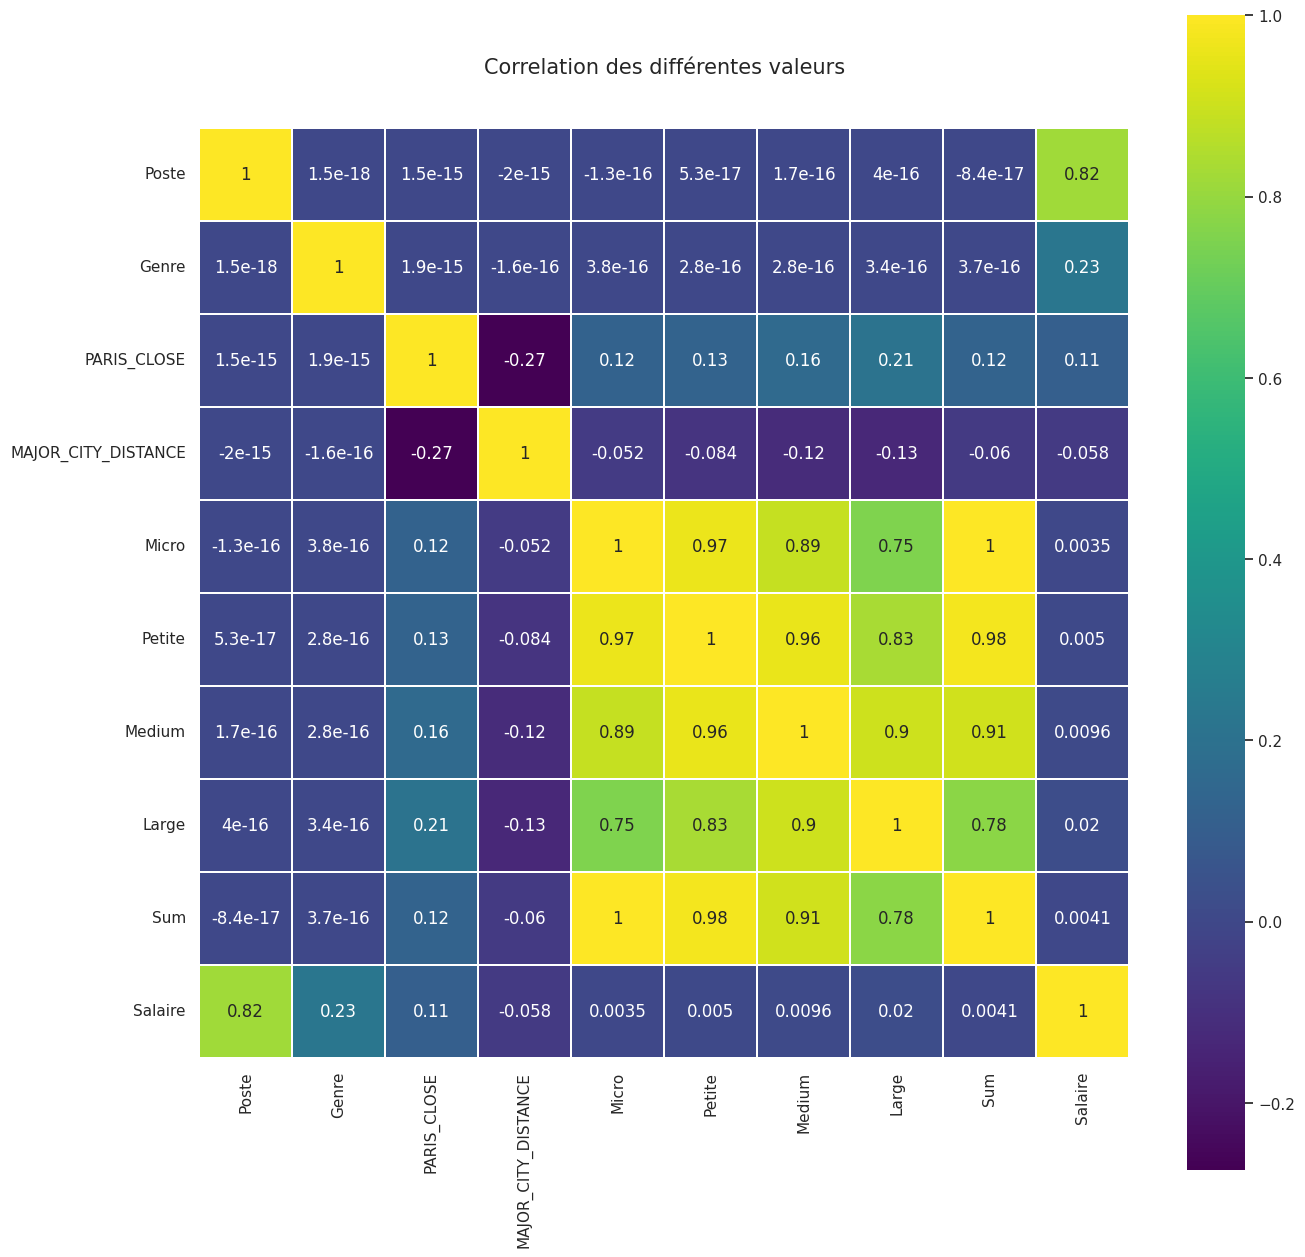

In [ ]:
# On verifie la correlation
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation des différentes valeurs', y=1.05, size=15)
sns.heatmap(french_industry.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

ON PASSE A NOTRE MACHINE LEARNING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Separation des données du dataframe feats variable explicatives et target variable cible
feats = french_industry.drop('Salaire', axis = 1)
target = french_industry['Salaire']

In [ ]:
# Création d'un ensemble d'entrainement et un ensemble test
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.25, random_state = 42)

In [ ]:
print("Train Set:", X_train.shape)
print("Test Set:", X_test.shape)

Train Set: (31206, 9)
Test Set: (10402, 9)


In [ ]:
# Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.head()

,Poste,Genre,PARIS_CLOSE,MAJOR_CITY_DISTANCE,Micro,Petite,Medium,Large,Sum
43088,4.0,1.0,0.0,50.0,167.0,45.0,8.0,0.0,220.0
22493,3.0,2.0,0.0,38.0,244.0,49.0,10.0,1.0,304.0
6211,1.0,1.0,0.0,83.0,24.0,5.0,0.0,0.0,29.0
22672,4.0,1.0,0.0,124.0,19.0,0.0,0.0,0.0,19.0
12124,4.0,2.0,0.0,208.0,133.0,37.0,6.0,1.0,177.0


LINEARREGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)

# Prediction du resultat sur test
y_pred_lr = regressor_lr.predict(X_test)

DECISIONTREEREGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor_dtr = DecisionTreeRegressor(random_state = 42)
regressor_dtr.fit(X_train, y_train)

# Prediction du resultat sur test
y_pred_dtr = regressor_dtr.predict(X_test)

RANDOMFORESTREGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor_rfr = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor_rfr.fit(X_train, y_train)

# Prediction du resultat sur test
y_pred_rfr = regressor_rfr.predict(X_test)

RECHERCHE DE L'ACCURACY

In [ ]:
from sklearn.linear_model import LinearRegression
cl1 = LinearRegression()
cl1.fit(X_train_scaled, y_train)
print("Accuracy score de la Régression Linéaire : ",
      cl1.score(X_test_scaled, y_test))

from sklearn.tree import DecisionTreeRegressor
cl2 = DecisionTreeRegressor()
cl2.fit(X_train_scaled, y_train)
print("Accuracy score de l'Arbre de Décision de regression : ",
      cl2.score(X_test_scaled, y_test))

from sklearn.ensemble import RandomForestRegressor
cl3 = RandomForestRegressor()
cl3.fit(X_train_scaled, y_train)
print("Accuracy score du Random Forest : ",
      cl3.score(X_test_scaled, y_test))

Accuracy score de la Régression Linéaire :  0.7300104743621594
Accuracy score de l'Arbre de Décision de regression :  0.803366701325216
Accuracy score du Random Forest :  0.884953826608382


RECHERCHE DE LA R2

In [ ]:
def standard_error(y_pred, y_test):
    sum_value = 0
    for p, t in zip(y_pred, y_test):
        sum_value += (p - t)**2

    return((sum_value/len(y_test))**(1/2))

In [ ]:
from sklearn.metrics import r2_score

score_lr = r2_score(y_pred_lr, y_test)
print("r2 pour la regression linéaire est égale à : " + str(round(score_lr, 3)))
score_dtr = r2_score(y_pred_dtr, y_test)
print("r2 pour l'arbre de decision regression est égal à : " + str(round(score_dtr, 3)))
score_rfr = r2_score(y_pred_rfr, y_test)
print("r2 pour la random forest regression est égal à : " + str(round(score_rfr, 3)))

r2 pour la regression linéaire est égale à : 0.631
r2 pour l'arbre de decision regression est égal à : 0.805
r2 pour la random forest regression est égal à : 0.87


In [ ]:
error_lr = standard_error(y_pred_lr.tolist(), y_test.tolist())
print("standard error pour la regression linéaire est égale à :" + str(round(error_lr, 3)))
error_dtr = standard_error(y_pred_dtr.tolist(), y_test.tolist())
print("standard error pour l'arbre de decision regression est égal à : " + str(round(error_dtr, 3)))
error_rfr = standard_error(y_pred_rfr.tolist(), y_test.tolist())
print("standard error pour la random forest regression est égal à : " + str(round(error_rfr, 3)))

standard error pour la regression linéaire est égale à :2.819
standard error pour l'arbre de decision regression est égal à : 2.416
standard error pour la random forest regression est égal à : 1.896


VISUALISATION DES VALEURS QUI IMPACTENT LES RESULTATS

<Axes: >

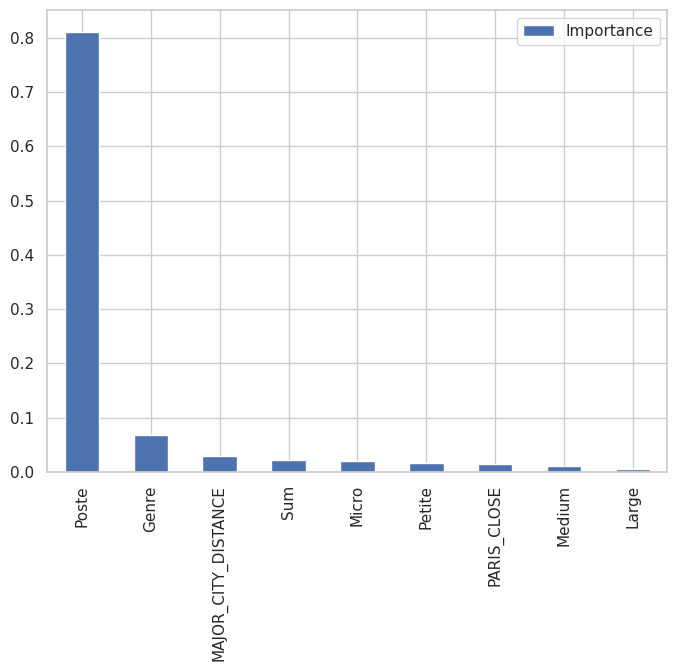

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
feat_importances = pd.DataFrame(cl3.feature_importances_, index = feats.columns, columns = ['Importance'])
feat_importances.sort_values(by= 'Importance', ascending = False, inplace = True )
feat_importances.plot(kind ='bar', figsize = (8,6))